

<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning - Gradient Descent Optimization </b></font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---



### Packages Used:

- [NumPy](http://www.numpy.org/): a fundamental package for scientific computing with Python.
- [seaborn](https://seaborn.pydata.org/): statistical data visualization.
- [Bokeh](http://bokeh.pydata.org/en/latest/): a Python interactive visualization library that targets modern web browsers for presentation.
- [Matplotlib](https://matplotlib.org/): a Python 2D plotting library.
- [Sklearn](http://scikit-learn.org/stable/): Machine Learning tools in Python.
- [SciPy](https://www.scipy.org/): a Python-based ecosystem of open-source software for mathematics, science, and engineering.
- [JSAnimation](https://github.com/jakevdp/JSAnimation): an HTML/Javascript writer for Matplotlib animations.

In [1]:
# loading necessary libraries and setting up plotting libraries
import numpy as np
import seaborn as sns

import bokeh.plotting as bp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
from bokeh.models import  WheelZoomTool, ResetTool, PanTool
from bokeh.layouts import gridplot
from JSAnimation import IPython_display

%matplotlib inline

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# <font color='#347B98'> 1. Gradient Descent - Quadratic Function
    


## $\Delta$ 1.1 Make a regression dataset

In [2]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2015)

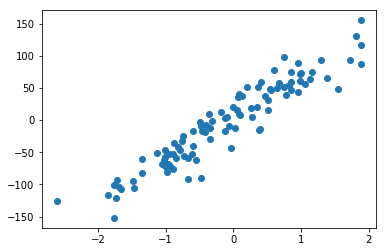

In [3]:
plt.plot(x, y, 'o')

---
# <font color='#347B98'> 2. Linear Regression with Gradient Descent
<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_regression_gradient_descent.gif' width='60%'>

## $\Delta$ 2.1 Make a Regression Dataset

In [20]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2015)

### Plot the dataset

In [21]:
def bp_plot_reg(x, y, y_pred=[], line=False):
    import bokeh.plotting as bp
    import matplotlib.pyplot as plot
    %matplotlib inline
    bp.output_notebook()

    WIDTH = 400
    HEIGHT = 300
    FONTSIZE = '14pt'

    fig = bp.figure(plot_width=WIDTH, plot_height=HEIGHT, 
                    title='Bokeh Regression', active_scroll = "auto")

    fig.title.text_font_size = FONTSIZE

    s1 = fig.circle(x, y, size=10, color='navy', alpha=0.5)
    
    if line:
        s_pred_line = fig.line(x, y_pred, color='orange', line_width=3)
        
    fig.xaxis.axis_label = "X"
    fig.yaxis.axis_label = "Y"

    bp.show(fig)

In [22]:
bp_plot_reg(x.flatten(), y)

Loading BokehJS ...

## $\Delta$ 2.2 Gradient Descent Implementation for Linear Regression

From the plot, you can see that there is a linear relation between the two variables. Let's calculate the regression line through gradient descent. From the example above, we know that we need two things to do so:

* a cost function.
* a way to minimize the cost by updating our parameters (update function)

For a simple regression, we have two parameters: the slope and the intercept. In this example, we express both by the vector $\theta$ with length 2. To find the best line, we have to iteratively find the values of theta that minimize the cost. While in the first example, we defined the cost simple as the squared distance from the true minimum, the cost function $J(\theta)$ for linear regression is a little more complex and defined as follows: 

$$\begin{align}
J(\theta) =  \frac{1}{2m}(X\theta-y)^{T}(X\theta-y)
\end{align}$$

which translates as: For the current $\theta$, predict the $y$ values, and subtract the actual $y$ value. Then square this error ($X\theta-y$). This measures how far away the predicted values are from the actual value of $y$. The overall cost is scaled by $m$, the number of data points we have in $y$, in our example 100.

To minimize this cost function, the theta values have to changed accordingly. The update function is defined as:

$$\begin{align}
\theta := \theta - \alpha \frac{1}{m} (X^{T}(X\theta-y))
\end{align}$$

Theta is adjusted relative to the error of our predicted values, and then scaled by $m$. $\alpha$ is the step-size: As in the earlier example, this value has to be chosen carefully. If you are interested in the mathematical derivations of these functions, you can read through Andrew Ng's [lecture notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) on the topic, but for this example it suffices to know that they derive on partial derivatives, and thus on the gradient.

Below, the function `gradient_descent` implements the two functions above and adjusts theta iteratively for `iters` iterations. The code is pretty verbose, so you should be able to match the code to the functions above.

### $\delta$ Gradient descent function

In [23]:
def gradient_descent(x, y, iters, alpha):
    import numpy as np
    costs = []
    m = y.size # number of data points
    theta = np.random.rand(2) # random start
    history = [theta] # to store all thetas
    preds = []
    for i in range(iters):
        pred = np.dot(x, theta)
        error = pred - y 
        cost = np.sum(error ** 2) / (2 * m)
        costs.append(cost)
        
        if i % 25 == 0: 
            preds.append(pred)

        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  # update
        history.append(theta)
        
    return history, costs, preds

In [24]:
x.flatten()[:10]

array([ 0.8231471 ,  0.08680535,  1.88241864,  0.50613439, -0.75673415,
       -1.68487207, -0.46389728, -1.66739768, -0.93386042,  0.95890526])

In [25]:
y[:10]

array([  54.15137225,   39.86870962,   87.1163546 ,   31.80955881,
        -32.00750279, -104.12227893,  -16.17595565, -106.52943952,
        -71.98436887,   43.76160764])

### $\delta$ Add a constant X0  to the data for the intercept

In [26]:
# Use numpy.c_ to add a column with constant value 1
x = np.c_[np.ones(x.shape[0]), x] 

In [27]:
x[:5]

array([[ 1.        ,  0.8231471 ],
       [ 1.        ,  0.08680535],
       [ 1.        ,  1.88241864],
       [ 1.        ,  0.50613439],
       [ 1.        , -0.75673415]])

### $\delta$ Step parameters

In [28]:
alpha = 0.01 # set step-size
iters = 5000 # set number of iterations

### $\delta$ Run gradient descent

In [29]:
history, cost, preds = gradient_descent(x, y, iters, alpha)

In [30]:
theta = history[-1]  # the last value in the theta history list is the final parameter

In [31]:
print("theta_0: {:.2f}, \ntheta_1: {:.2f}".format(theta[0], theta[1]))

theta_0: 2.98, 
theta_1: 62.84


### $\delta$ Make predictions

In [32]:
pred = np.dot(x, theta)

In [33]:
bp_plot_reg(x[:,1], y, pred, line=True)

Loading BokehJS ...

---
## $\Delta$ 2.3 Gradient Descent Parameter Tuning


### 2.3.1 - Make a Regression Dataset

In [34]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2015)

x = np.c_[np.ones(x.shape[0]), x] 

### 2.3.2 - Plot the dataset

In [35]:
def bp_plot_reg(x, y, y_pred=[], line=False, comment='Raw Data'):
    import bokeh.plotting as bp
    import matplotlib.pyplot as plot
    %matplotlib inline
    bp.output_notebook()

    WIDTH = 400
    HEIGHT = 300
    FONTSIZE = '14pt'

    fig = bp.figure(plot_width=WIDTH, plot_height=HEIGHT, 
                    title='Linear Regression - {}'.format(comment))

    fig.title.text_font_size = FONTSIZE

    s1 = fig.circle(x, y, size=10, color='navy', alpha=0.5)
    
    if line:
        s_pred_line = fig.line(x, y_pred, color='orange', line_width=3)
        
    fig.xaxis.axis_label = "X"
    fig.yaxis.axis_label = "Y"

    bp.show(fig)

In [36]:
bp_plot_reg(x[:,1], y)

Loading BokehJS ...

### 2.3.3 Create `linear_regression` function

#### <font color='#FC7307'> $\delta$ gradient descent

In [37]:
def gradient_descent(x, y, iters, alpha):
    import numpy as np
    costs = []
    m = y.size # number of data points
    theta = np.random.rand(2) # random start
    history = [] # to store all thetas
    preds = []
    for i in range(iters):
        pred = np.dot(x, theta)
        error = pred - y 
        cost = np.sum(error ** 2) / (2 * m)
        costs.append(cost)
        
        if i % 25 == 0: 
            preds.append(pred)

        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  # update
        history.append(theta)
        
    return history, costs, preds

#### <font color='#FC7307'> $\delta$ linear regression function

In [38]:
def linear_regression(x, y, alpha, iterations):
    alpha = alpha # set step-size
    iters = iterations # set number of iterations
    history, cost, preds = gradient_descent(x, y, iters, alpha)
    return history, cost, preds

#### <font color='#FC7307'> $\delta$ plot cost function history

In [55]:
def bp_plot_cost_hist(cost):
    import bokeh.plotting as bp
    import matplotlib.pyplot as plot
    %matplotlib inline
    bp.output_notebook()
    
    x_iteration, y_cost = (zip(*enumerate(cost)))

    fig = bp.figure(width=590, plot_height=350, 
                title='Loss over iterations',
                x_axis_label='Iteration',
                y_axis_label='Loss',
                active_scroll="auto")
    s1 = fig.line(x_iteration,y_cost, line_width=4, color='navy', alpha=0.5)
    fig.title.text_font_size = '16pt'
    fig.yaxis.axis_label_text_font_size = "14pt"
    fig.xaxis.axis_label_text_font_size = "14pt"

    bp.show(fig)

In [56]:
history, costs, preds = linear_regression(x, y, alpha=0.01, iterations=500)

In [57]:
bp_plot_cost_hist(costs)

Loading BokehJS ...

### 2.3.4 - Parameter Tuning

#### <font color='#559E54'> $\delta$ Small learning rate `alpha`, small number of `iterations`

In [58]:
#############################
# You Code Below
#############################

# 1. set alpha = 0.001, iterations = 200
# 2. fit linear regression model
# 3. plot cost history
# 4. plot the fitted regression line along with the data points
# 5. discussion: can the model be improved? how would you tune the parameter?

history_1, costs_1, preds_1 = linear_regression(x, y, alpha=0.001, iterations=200)

In [59]:
bp_plot_cost_hist(costs_1)

Loading BokehJS ...

In [60]:
theta_1 = history_1[-1]
pred_1 = np.dot(x, theta_1)

bp_plot_reg(x[:,1], y, pred_1, line=True, comment='Bad Fit')

Loading BokehJS ...

#### <font color='#559E54'> $\delta$ Small learning rate `alpha`, large number of `iterations`

In [66]:
#############################
# You Code Below
#############################

# 1. set alpha = 0.001, iterations = 1000
# 2. fit linear regression model
# 3. plot cost history
# 4. plot the fitted regression line along with the data points
# 5. discussion: has the model improved? any room for further improvement?

history_2, costs_2, preds_2 = linear_regression(x, y, alpha=0.001, iterations=1000)

In [67]:
bp_plot_cost_hist(costs_2)

Loading BokehJS ...

In [68]:
theta_2 = history_2[-1]
pred_2 = np.dot(x, theta_2)

bp_plot_reg(x[:,1], y, pred_2, line=True, comment='Better Fit')

Loading BokehJS ...

#### <font color='#559E54'> $\delta$ Bigger learning rate `alpha`, small number of `iterations`

In [69]:
#############################
# You Code Below
#############################

# 1. set alpha = 0.5, iterations = 100
# 2. fit linear regression model
# 3. plot cost history
# 4. plot the fitted regression line along with the data points
# 5. discussion: what can we learn from the loss over iterations plot? 

history_3, costs_3, preds_3 = linear_regression(x, y, alpha=0.5, iterations=100)
bp_plot_cost_hist(costs_3)

Loading BokehJS ...

In [70]:
theta_3 = history_3[-1]
pred_3 = np.dot(x, theta_3)

bp_plot_reg(x[:,1], y, pred_3, line=True, comment='Good Fit')

Loading BokehJS ...

---
## $\Delta$ 2.4 Gradient Descent Cost Contour Plot


### 2.4.1 - Make data

In [71]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2015)

x = np.c_[np.ones(x.shape[0]), x] 

### 2.4.2 - Fit regression using gradient descent

In [72]:
history, costs, preds = linear_regression(x, y, alpha=0.1, iterations=2000)

theta = history[-1] # this is the final theta weights

In [73]:
theta

array([ 2.9788317 , 62.83550856])

### 2.4.3 - Prepare data for the contour surface

#### <font color='#559E54'> $\delta$ Create meshgrid for the theta coordinates

In [74]:
x1 = np.linspace(theta[0] - 40 , theta[0] + 40, 40)
x2 = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

x1x1, x2x2 = np.meshgrid(x1, x2)

#### <font color='#559E54'> $\delta$ Calculate cost function for each $\theta$ coordinate

In [75]:
thetas_surface = zip(x1x1.ravel(), x2x2.ravel())

In [76]:
costs_surface = []
for theta_surface in thetas_surface:
    error_surface = np.dot(x, np.array(theta_surface)) - y
    cost_surface = np.sum(error_surface ** 2) / (2 * y.size)
    costs_surface.append(cost_surface)

#### <font color='#559E54'> $\delta$ Use `matplotlib` 3D to plot the contour surface

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [78]:
theta_0 = [theta[0] for theta in history]
theta_1 = [theta[1] for theta in history]

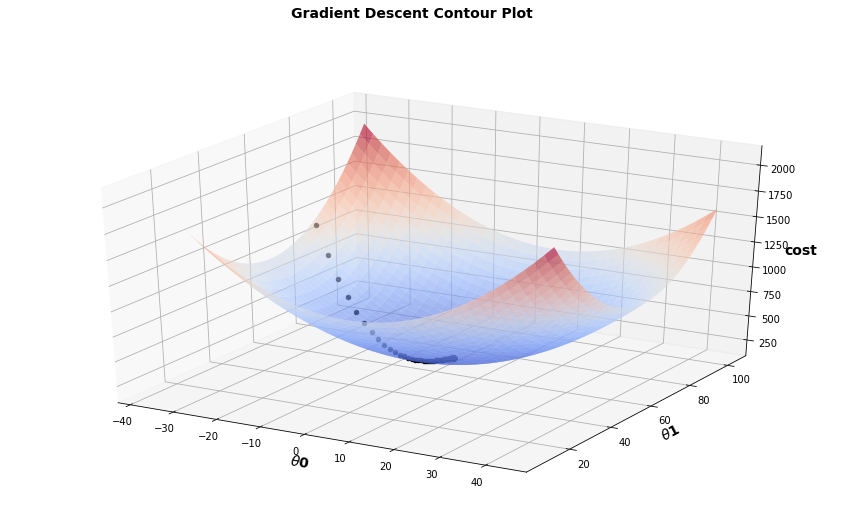

In [79]:
fig = plt.figure(1, figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(theta_0, theta_1, np.array(costs), 
           c='k', 
           marker='o', 
           depthshade=False, 
           alpha=1)

ax.plot_surface(x1x1, x2x2, np.array(costs_surface).reshape(x1x1.shape), 
                cmap=cm.coolwarm, 
                alpha=0.6, 
                rstride=1, 
                cstride=1,
                shade=False)

ax.set_xlabel(r'$\theta$0', fontsize=14, fontweight='bold')
ax.set_ylabel(r'$\theta$1', fontsize=14, fontweight='bold')
ax.set_zlabel(r'cost', fontsize=14, fontweight='bold')
fig.suptitle("Gradient Descent Contour Plot", fontsize=14, fontweight='bold')

plt.show()

---
## $\Delta$ 2.5 Animating Model Fitting
Below is an animated plot that shows the changing line (green) defined by the $\theta$ values over time. It starts with our random thetas close to 0 which results in a horizontal line, and then slowly approaches the line of best fit (red). As evident in the cost plot, the improvement slows down over subsequent iterations and barely changes at the end.

In [80]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2015)

x = np.c_[np.ones(x.shape[0]), x] 

In [81]:
history, costs, preds = linear_regression(x, y, alpha=0.01, iterations=500)

In [82]:
best_fit = preds[-1]


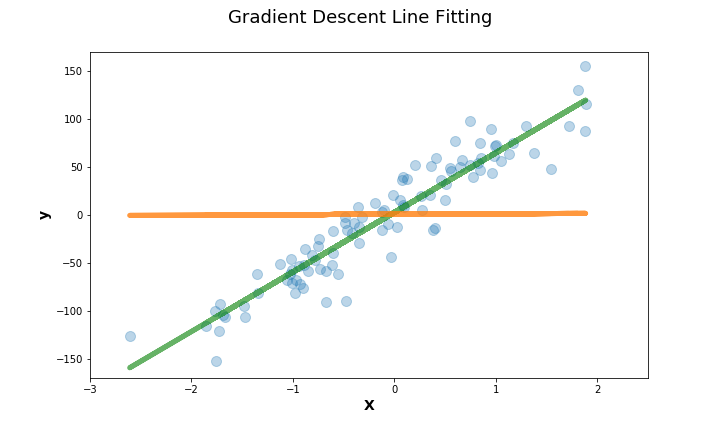
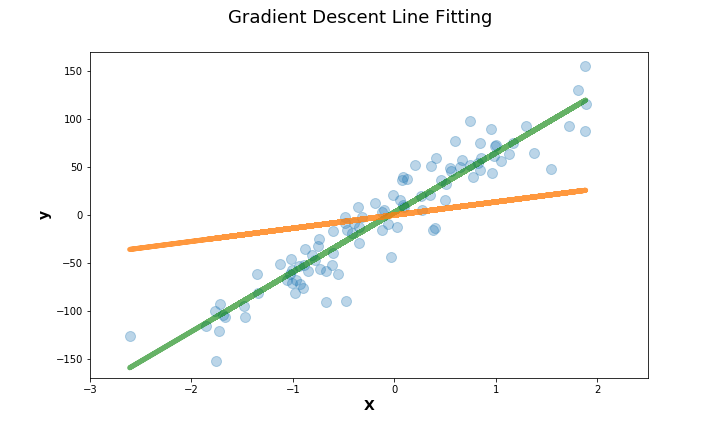
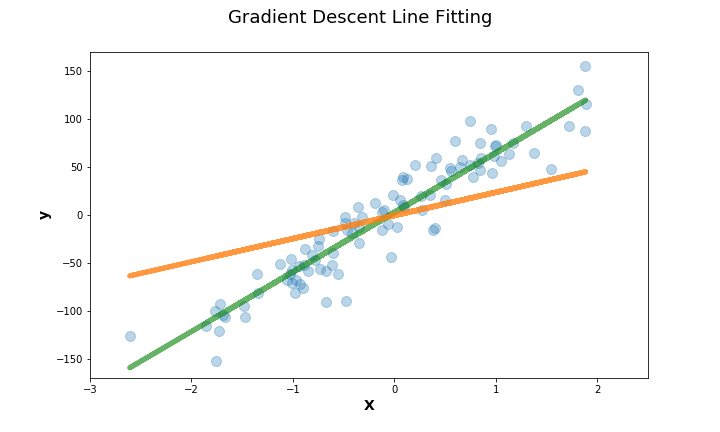
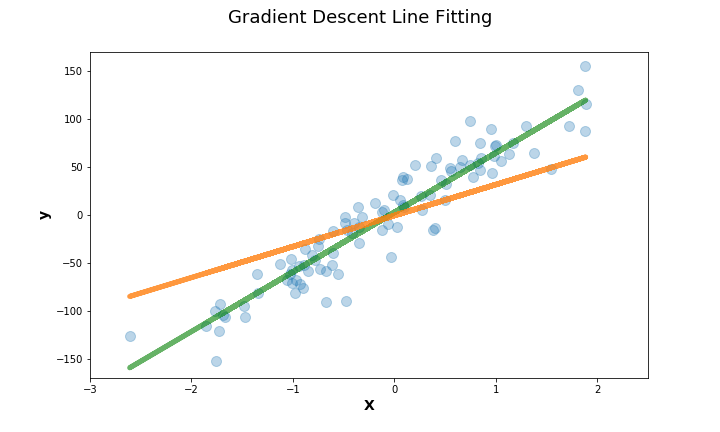
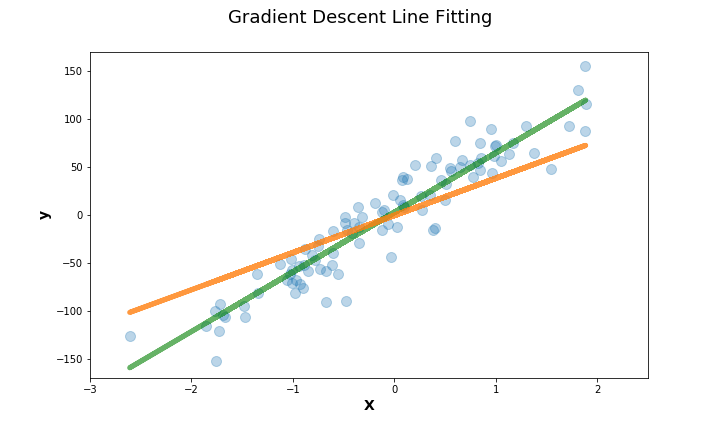
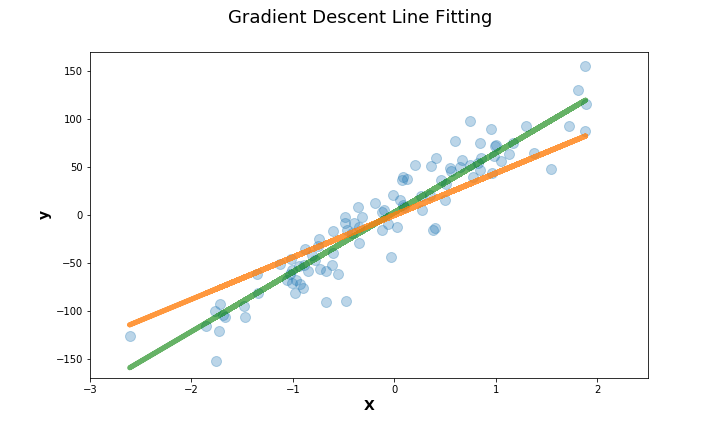
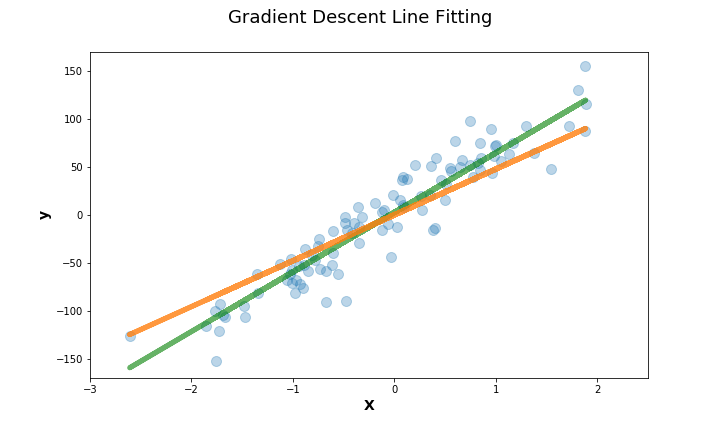
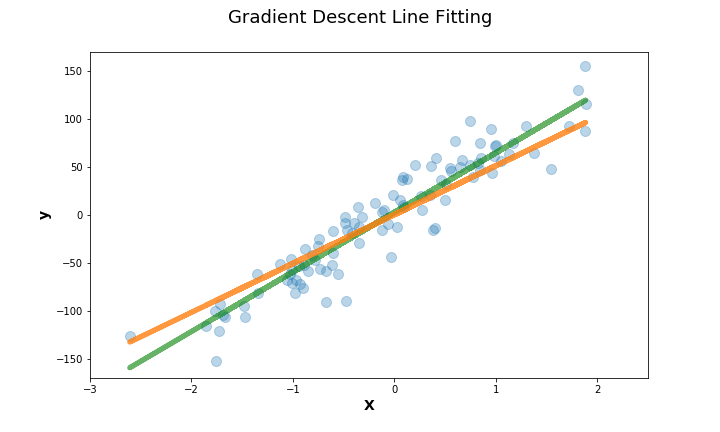
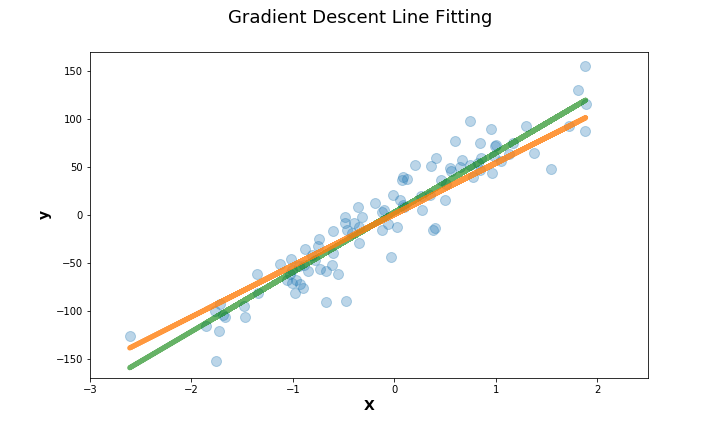
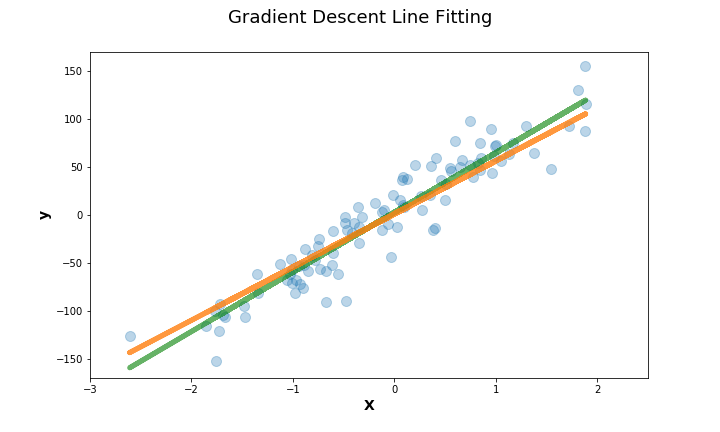
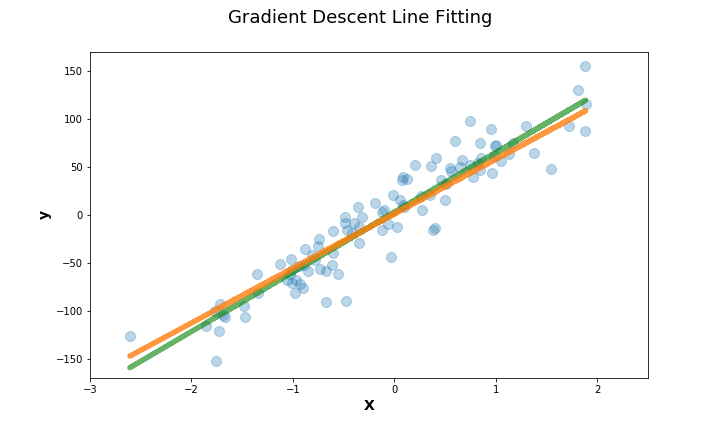
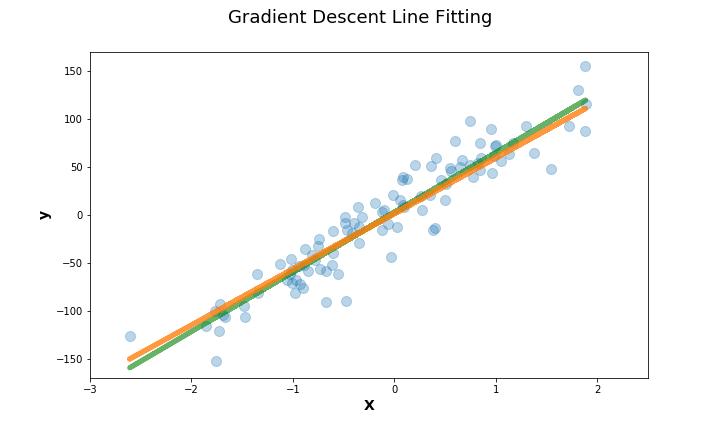
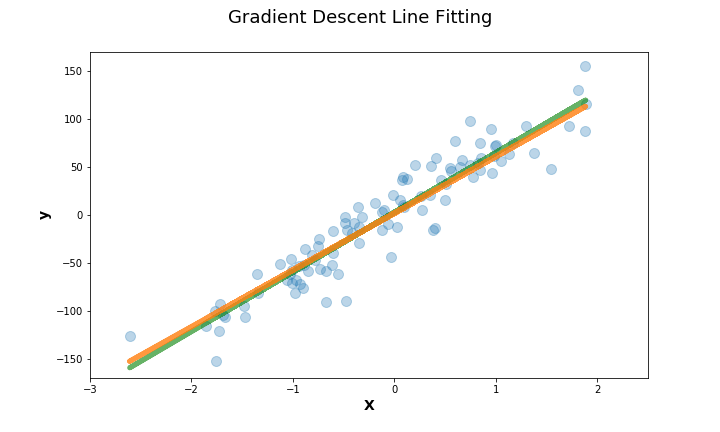
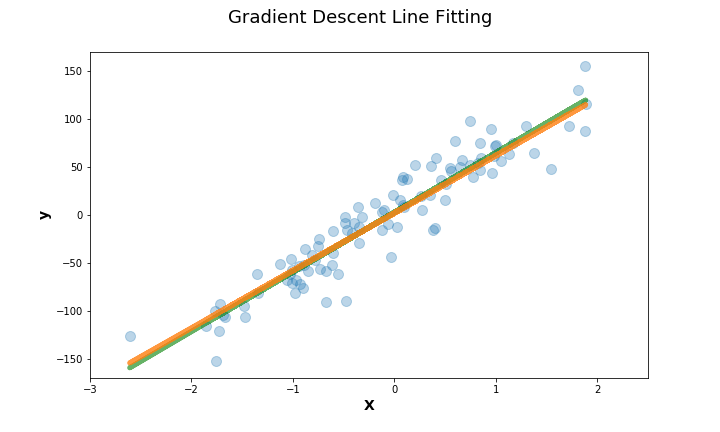
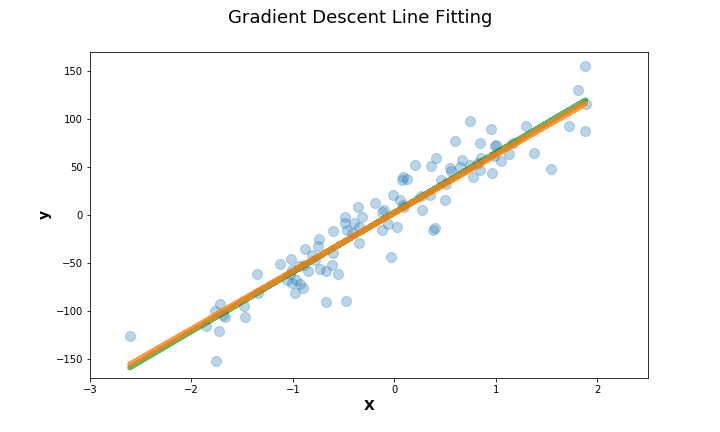
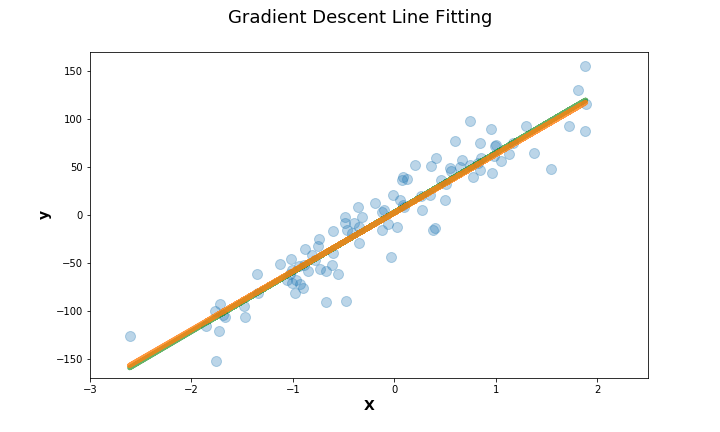
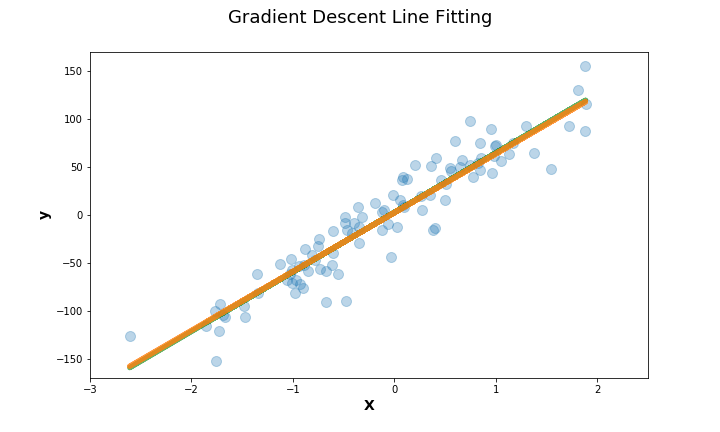
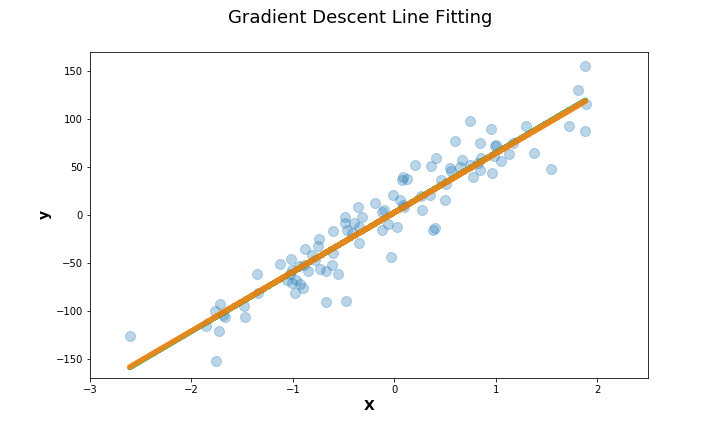
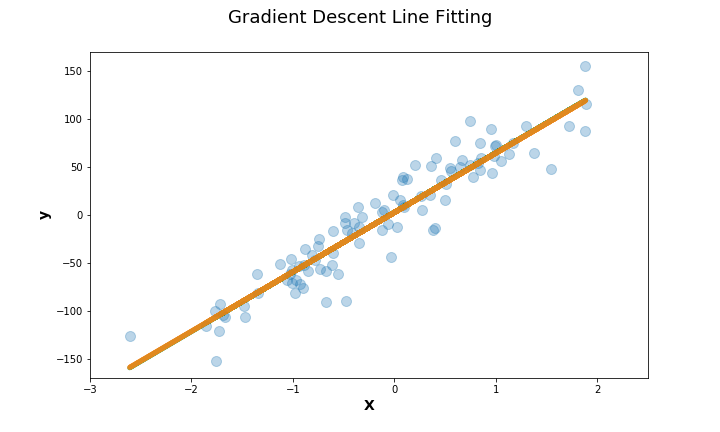
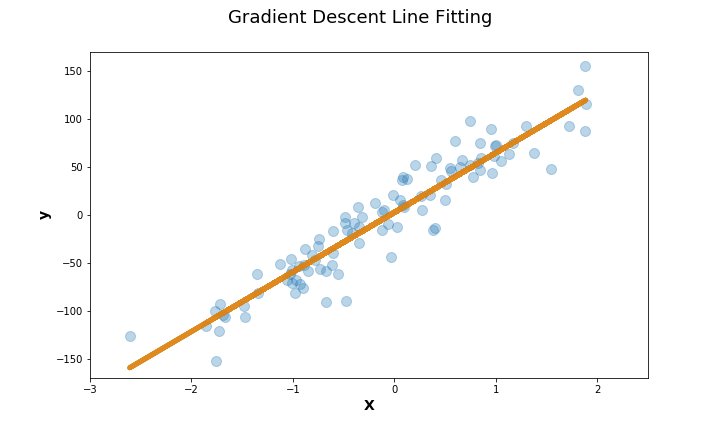

In [83]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    ys = preds[i]
    line.set_data(x[:,1], ys)
    return line,

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 2.5), ylim=(-170, 170))
ax.set_xlabel(r'X', fontsize=14, fontweight='bold')
ax.set_ylabel(r'y', fontsize=14, fontweight='bold')
plt.suptitle('Gradient Descent Line Fitting', fontsize=18)
# plot data
ax.plot(x[:,1],y, 'o', alpha=0.3, markersize=10)

# plot best fit line
plt.plot(x[:,1], best_fit, 'k-', color = "g", linewidth=5, alpha=0.6)

# plot fitted line
line, = ax.plot([], [], linewidth=5, alpha=0.8)

# animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(preds), interval=100)
anim